<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-2-Buildweek-Project/blob/master/DS-Unit-2-Buildweek-Project/RandomForestClassiifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os

In [0]:
pwd

'/Users/fonat/Desktop/Lambda School/Build_Unit_2_Project_Auto_Insurance_France'

In [0]:

df = pd.read_csv(r'/Users/fonat/Desktop/Lambda School/Build_Unit_2_Project_Auto_Insurance_France/french_auto_insurance.csv')

In [0]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [0]:
df.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [0]:
import sys
!{sys.executable} -m pip install pandas-profiling


In [0]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile



In [0]:
df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [0]:
df['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

In [0]:
# Baseline for the majority class
df['ClaimNb'].value_counts(normalize=True)

0     0.949765
1     0.047459
2     0.002631
3     0.000121
4     0.000010
11    0.000004
5     0.000003
16    0.000001
9     0.000001
8     0.000001
6     0.000001
Name: ClaimNb, dtype: float64

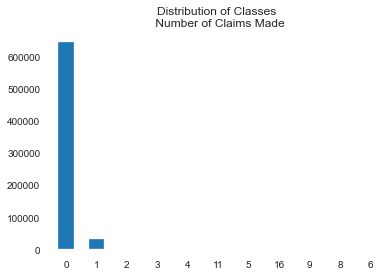

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
# view the distribution of the classes with undersampling
plt.title('Distribution of Classes \n Number of Claims Made')
df['ClaimNb'].value_counts().plot.bar(rot=0);

In [0]:
df.dtypes

IDpol         float64
ClaimNb         int64
Exposure      float64
Area           object
VehPower        int64
VehAge          int64
DrivAge         int64
BonusMalus      int64
VehBrand       object
VehGas         object
Density         int64
Region         object
dtype: object

In [0]:
df.nunique()

IDpol         678013
ClaimNb           11
Exposure         187
Area               6
VehPower          12
VehAge            78
DrivAge           83
BonusMalus       115
VehBrand          11
VehGas             2
Density         1607
Region            22
dtype: int64

## Random Forest Classifier with the original Dataset
              


In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
df_model_2 = df.copy()

In [0]:
df_model_2['ClaimNb'].value_counts(normalize=True)

0     0.949765
1     0.047459
2     0.002631
3     0.000121
4     0.000010
11    0.000004
5     0.000003
16    0.000001
9     0.000001
8     0.000001
6     0.000001
Name: ClaimNb, dtype: float64

In [0]:
df_model_2['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

In [0]:
# I will create a new column for number of claims per policy.
df_model_2['ClaimNumber'] = df_model_2['ClaimNb']

In [0]:
df_model_2.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1


In [0]:
# I modify the new 'Claimnumber' column to have just 2 classes : 0 ='no claim', 1= 'Claim'. 
df_model_2['ClaimNumber'] = df_model_2['ClaimNumber'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 11:1 ,
                                                               5: 1, 16: 1, 9: 1, 8: 1, 6:1})
df_model_2.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1


In [0]:
# I will use "ClaimNumber" feature as the target for the model
y = df_model_2['ClaimNumber']

In [0]:
# Baseline for the majority class
df_model_2['ClaimNumber'].value_counts(normalize=True)*100

0    94.976498
1     5.023502
Name: ClaimNumber, dtype: float64

In [0]:
df_model_2.dtypes

IDpol          float64
ClaimNb          int64
Exposure       float64
Area            object
VehPower         int64
VehAge           int64
DrivAge          int64
BonusMalus       int64
VehBrand        object
VehGas          object
Density          int64
Region          object
ClaimNumber      int64
dtype: object

## Base Model 2
Target= ClaimNumber
Model= Random Forest
Evaluation Metric. = F-1 Score and Validation Accuracy

Description = Make ClaimNumber feature 2-class feature

In [0]:
# Split for test and train
train_rf, test_rf = train_test_split(df_model_2, train_size=0.80, test_size=0.20, stratify=df_model_2['ClaimNumber'], random_state=42)

train_rf.shape, test_rf.shape

((542410, 13), (135603, 13))

In [0]:
# Split for train and val 
train_rf, val_rf = train_test_split(train_rf, train_size = 0.80, test_size=0.20, stratify=train_rf['ClaimNumber'], random_state=42)

train_rf.shape, val_rf.shape

((433928, 13), (108482, 13))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb as they are a function of our target.
    column_drop = ['IDpol','ClaimNb']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train_rf = wrangle(train_rf)
val_rf = wrangle(val_rf)
test_rf = wrangle(test_rf)

In [0]:
# Arranging features matrix and y target vector
target = 'ClaimNumber'
X_train_rf = train_rf.drop(columns=target)
y_train_rf = train_rf[target]
X_val_rf = val_rf.drop(columns=target)
y_val_rf = val_rf[target]
X_test_rf = test_rf.drop(columns=target)
y_test_rf = test_rf[target]

In [0]:
y_test_rf.head()

673753    0
289208    0
499438    0
440941    0
216301    0
Name: ClaimNumber, dtype: int64

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier


pipeline = make_pipeline(
    ce.OrdinalEncoder(),  
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train_rf, y_train_rf)


# Score on val
print('Validation Accuracy: %.4f%%' % pipeline.score(X_val_rf, y_val_rf))


Validation Accuracy: 0.9485%


In [0]:
# Predict on test
y_pred_rf = pipeline.predict(X_test_rf)

# Test accuracy
accuracy = accuracy_score(y_pred_rf, y_test_rf)

print("Accuracy : %.4f%%" % (accuracy * 100.0))

Accuracy : 94.8172%


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_rf, y_pred_rf)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[128457    334]
 [  6694    118]]


Random Forest Classifier 
Confusion Matrix


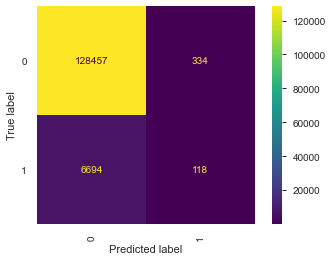

In [0]:
# Explanatory graph: Confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
title='Random Forest Classifier \nConfusion Matrix'
print(title)
plot_confusion_matrix(pipeline, X_test_rf, y_test_rf, values_format='.0f', xticks_rotation='vertical');

In [0]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test_rf, y_pred_rf))

Classification Report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.97    128791
           1       0.26      0.02      0.03      6812

    accuracy                           0.95    135603
   macro avg       0.61      0.51      0.50    135603
weighted avg       0.92      0.95      0.93    135603



## Random Forest with downsampling

In [0]:
df_model_2.head() 

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1


In [0]:
# import resample module 
from sklearn.utils import resample

# separate the minority and majority classes
df_majority = df_model_2[df_model_2['ClaimNumber']==0]
df_minority = df_model_2[df_model_2['ClaimNumber']==1]

# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=34060, random_state=0)


# combine majority class with oversampled minority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])


# display new class value counts
df_undersampled['ClaimNumber'].value_counts()

1    34060
0    34060
Name: ClaimNumber, dtype: int64

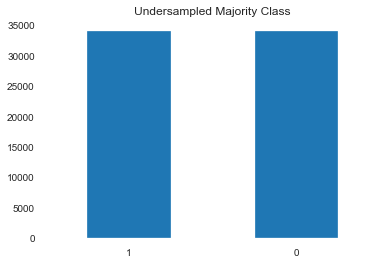

In [0]:
# view the distribution of the classes with undersampling
plt.title('Undersampled Majority Class')
ax=(df_undersampled['ClaimNumber'].value_counts()).plot.bar(rot=0);

In [0]:
#Split the data
train, test = train_test_split(df_undersampled, test_size=0.2, stratify=df_undersampled['ClaimNumber'], random_state=42)

train.shape, test.shape

((54496, 13), (13624, 13))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb as they are a function of our target.
    column_drop = ['IDpol','ClaimNb']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train = wrangle(train)
test = wrangle(test)

In [0]:
train.head()

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
183287,0.50,D,5,6,26,72,B1,Diesel,572,R93,0
443957,0.79,D,12,3,39,76,B11,Regular,983,R52,1
304162,0.49,E,5,15,46,76,B5,Diesel,8915,R11,0
1079,0.50,D,10,6,36,57,B12,Regular,1955,R94,1
1254,0.20,E,5,0,41,50,B12,Regular,3301,R73,1


In [0]:
# Arranging features matrix and y target vector
target = 'ClaimNumber'
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),  
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Area', 'VehBrand', 'VehGas', 'Region'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Area',
                                          'data_type': dtype('O'),
                                          'mapping': D      1
E      2
B      3
C      4
A      5
F      6
NaN   -2
dtype: int64},
                                         {'col': 'VehBrand',
                                          'data_type': dtype('O'),
                                          'mapping': B1      1
B11     2
B5      3
B12     4
B2      5
B13     6
B3      7
B10     8
B4      9
B6     10
B14    11
Na...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                              

In [0]:
# Predict on Test
y_pred = pipeline.predict(X_test)
y_pred.shape, y_test.shape

((13624,), (13624,))

In [0]:
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Test Accuracy', pipeline.score(X_test, y_test))


Train Accuracy 0.9992109512624779
Test Accuracy 0.6368173810921902


In [0]:
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : %.4f%%" % (accuracy * 100.0))

Accuracy : 63.6817%


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[4432 2380]
 [2568 4244]]


Random Forest Classifier-Undersampled
 Confusion Matrix


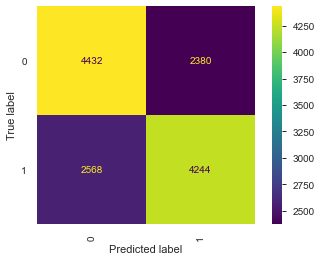

In [0]:
# Explanatory graph: Confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
title='Random Forest Classifier-Undersampled\n Confusion Matrix'
print(title)
plot_confusion_matrix(pipeline, X_test, y_test, values_format='.0f', xticks_rotation='vertical');

In [0]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.63      0.65      0.64      6812
           1       0.64      0.62      0.63      6812

    accuracy                           0.64     13624
   macro avg       0.64      0.64      0.64     13624
weighted avg       0.64      0.64      0.64     13624



In [0]:
pipeline.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [0]:
pipeline.predict_proba(X_test)

array([[0.76      , 0.24      ],
       [0.49      , 0.51      ],
       [0.52      , 0.48      ],
       ...,
       [0.38      , 0.62      ],
       [0.51      , 0.49      ],
       [0.89833333, 0.10166667]])

In [0]:
pipeline.predict_proba(X_test)[:, 1]

array([0.24      , 0.51      , 0.48      , ..., 0.62      , 0.49      ,
       0.10166667])

In [0]:
threshold = 0.50
pipeline.predict_proba(X_test)[:, 1] > threshold

array([False,  True, False, ...,  True, False, False])

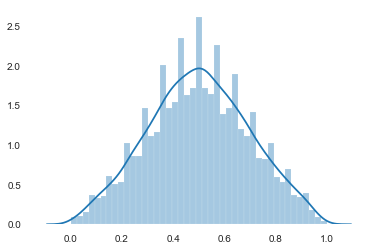

In [0]:
import seaborn as sns

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
sns.distplot(y_pred_proba);

False    7000
True     6624
dtype: int64

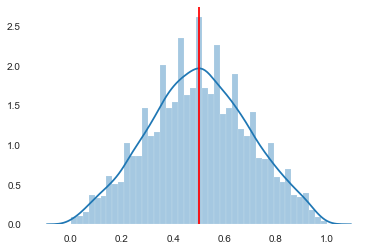

In [0]:
threshold = 0.50

y_pred = y_pred_proba > threshold

ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [0]:
# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

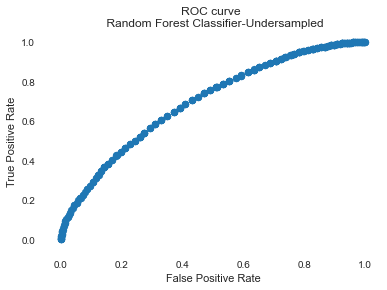

In [0]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
plt.scatter(fpr, tpr)
plt.title('ROC curve \n Random Forest Classifier-Undersampled')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.6956345969376689

### Getting my model's permutation importances

In [0]:
transformers = make_pipeline(ce.OrdinalEncoder(), 
                             SimpleImputer(strategy='median'))

X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model=RandomForestClassifier()
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=5, 
    random_state=42)

permuter.fit(X_test_transformed, y_test)

/Users/fonat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/fonat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [0]:
feature_names= X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Exposure      0.062948
VehAge        0.042572
BonusMalus    0.031988
VehBrand      0.021609
DrivAge       0.017748
VehGas        0.010247
Region        0.009469
Density       0.009204
VehPower      0.008368
Area         -0.001365
dtype: float64

In [0]:
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0629 ± 0.0021,Exposure
0.0426 ± 0.0045,VehAge
0.0320 ± 0.0038,BonusMalus
0.0216 ± 0.0050,VehBrand
0.0177 ± 0.0073,DrivAge
0.0102 ± 0.0022,VehGas
0.0095 ± 0.0060,Region
0.0092 ± 0.0038,Density
0.0084 ± 0.0022,VehPower
-0.0014 ± 0.0019,Area


In [0]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox import pdp

In [0]:
feature = 'DrivAge'
encoder = ce.OrdinalEncoder()
X_test_encoded = encoder.fit_transform(X_test)
model = RandomForestClassifier()
model.fit(X_test_encoded, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

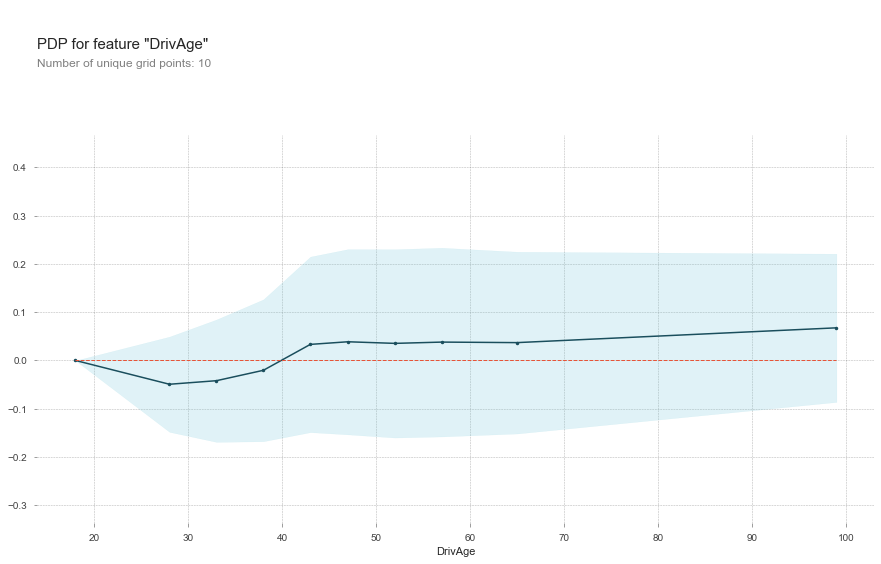

In [0]:
feature = 'DrivAge'
pdp_dist = pdp.pdp_isolate(model=model, dataset = X_test_encoded, model_features=X_test_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

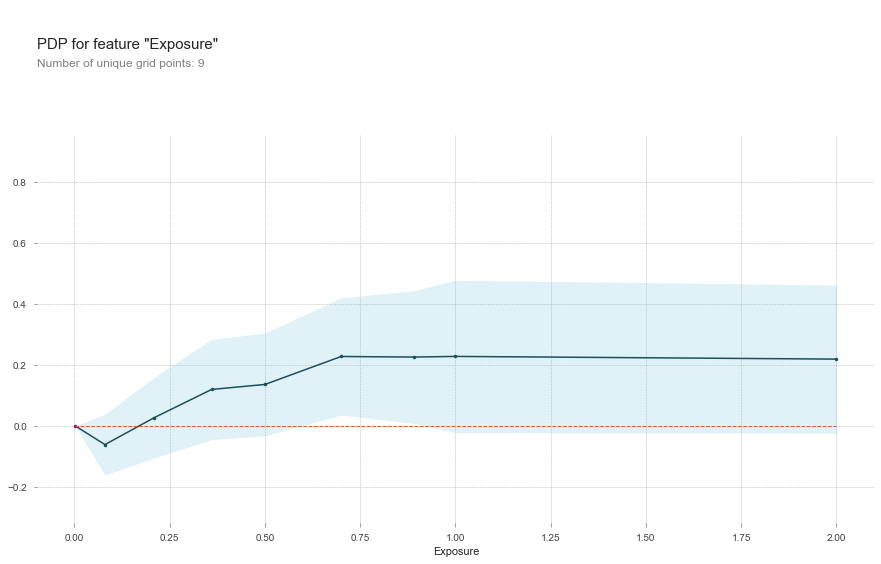

In [0]:
feature = 'Exposure'
pdp_dist = pdp.pdp_isolate(model=model, dataset = X_test_encoded, model_features=X_test_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

## I will oversample the minority class. 

In [0]:
# import resample module 
from sklearn.utils import resample

# separate the minority and majority classes
df_majority = df_model_2[df_model_2['ClaimNumber']==0]
df_minority = df_model_2[df_model_2['ClaimNumber']==1]

# oversample minority class
df_minority_oversampled = resample(df_minority, replace=True, n_samples=643953, random_state=0)


# combine majority class with oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# display new class value counts
df_oversampled['ClaimNumber'].value_counts()

1    643953
0    643953
Name: ClaimNumber, dtype: int64

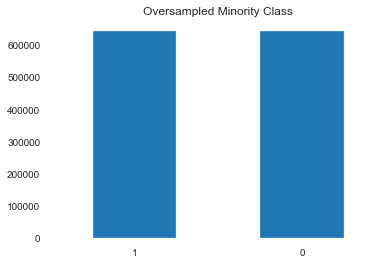

In [0]:
# view the distribution of the classes with undersampling
plt.title('Oversampled Minority Class')
df_oversampled['ClaimNumber'].value_counts().plot.bar(rot=0);

In [0]:
#Split the data
train2, test2 = train_test_split(df_oversampled, test_size=0.2, stratify=df_oversampled['ClaimNumber'], random_state=42)

train2.shape, test2.shape

((1030324, 13), (257582, 13))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb as they are a function of our target.
    column_drop = ['IDpol','ClaimNb']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train2 = wrangle(train2)
test2 = wrangle(test2)

In [0]:
# Arranging features matrix and y target vector
target = 'ClaimNumber'
X_train2 = train2.drop(columns=target)
y_train2 = train2[target]
X_test2 = test2.drop(columns=target)
y_test2 = test2[target]

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),  
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train2, y_train2)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Area', 'VehBrand', 'VehGas', 'Region'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Area',
                                          'data_type': dtype('O'),
                                          'mapping': D      1
C      2
A      3
E      4
B      5
F      6
NaN   -2
dtype: int64},
                                         {'col': 'VehBrand',
                                          'data_type': dtype('O'),
                                          'mapping': B1      1
B4      2
B10     3
B3      4
B2      5
B12     6
B5      7
B13     8
B6      9
B11    10
B14    11
Na...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                              

In [0]:
# Predict on Test
y_pred2 = pipeline.predict(X_test2)
y_pred2.shape, y_test2.shape

((257582,), (257582,))

In [0]:
print('Train Accuracy', pipeline.score(X_train2, y_train2))
print('Test Accuracy', pipeline.score(X_test2, y_test2))



Train Accuracy 0.9990536957306634
Test Accuracy 0.9927673517559457


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test2, y_pred2)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[126928   1863]
 [     0 128791]]


Random Forest Classifier-Oversampled 
 Confusion Matrix


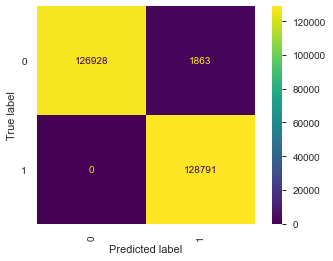

In [0]:
# Explanatory graph: Confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
title='Random Forest Classifier-Oversampled \n Confusion Matrix'
print(title)
plot_confusion_matrix(pipeline, X_test2, y_test2, values_format='.0f', xticks_rotation='vertical')

In [0]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test2, y_pred2))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99    128791
           1       0.99      1.00      0.99    128791

    accuracy                           0.99    257582
   macro avg       0.99      0.99      0.99    257582
weighted avg       0.99      0.99      0.99    257582



In [0]:
pipeline.predict(X_test2)

array([0, 0, 1, ..., 0, 0, 1])

In [0]:
pipeline.predict_proba(X_test2)

array([[0.96, 0.04],
       [0.8 , 0.2 ],
       [0.  , 1.  ],
       ...,
       [0.67, 0.33],
       [0.9 , 0.1 ],
       [0.  , 1.  ]])

In [0]:
pipeline.predict_proba(X_test2)[:, 1]

array([0.04, 0.2 , 1.  , ..., 0.33, 0.1 , 1.  ])

In [0]:
threshold = 0.50
pipeline.predict_proba(X_test2)[:, 1] > threshold

array([False, False,  True, ..., False, False,  True])

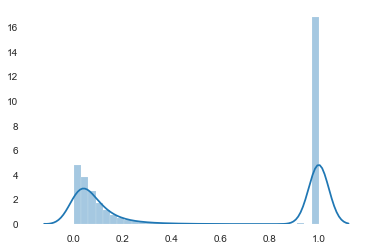

In [0]:
import seaborn as sns

y_pred_proba2 = pipeline.predict_proba(X_test2)[:, 1]
sns.distplot(y_pred_proba2);

True     130654
False    126928
dtype: int64

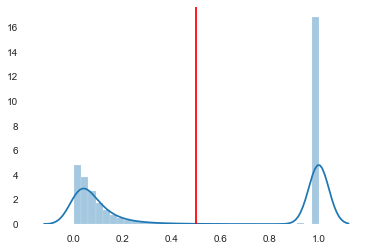

In [0]:
threshold = 0.50

y_pred2 = y_pred_proba2 > threshold

ax = sns.distplot(y_pred_proba2)
ax.axvline(threshold, color='red')

pd.Series(y_pred2).value_counts()

In [0]:
# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba2)

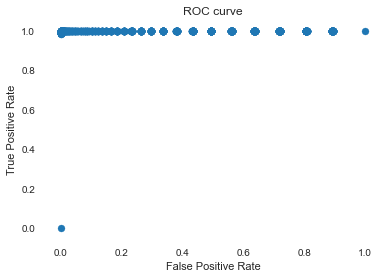

In [0]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test2, y_pred_proba2)

0.9997618993773632